In [169]:
import pandas as pd
import igraph as ig 
import numpy as np
import cairo
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def connectivity(Edge_number, Node_number):
    conn=Edge_number/(Node_number*(Node_number-1))
    return conn

# Connected components

In [55]:
df2=pd.DataFrame([
    ['v1','v2',0.3],
    ['v1','v4',0.6],
    ['v2','v3',0.9],
    ['v2','v4',0.2],
    ['v3','v7',0.6]
    ],
    columns=['n1','n2','w']
)
tuples = [tuple(x) for x in df2.values]
g2 = ig.Graph.TupleList(tuples, directed = True, edge_attrs = ['w'])
g2.add_vertex('v5')
g2.add_vertex('v6')
g2.add_vertex('v8')
g2.add_edge('v5','v6',w=0.4)
g2.add_edge('v5','v8',w=0.2)

g2.vs['color']='#bce4f2'
layout = g2.layout_auto()
#ig.plot(g2, layout=layout, bbox=[300,300], vertex_label=g2.vs['name'], vertex_color=g2.vs['color'])


# Density

In [11]:
g4 = ig.Graph()
g4.add_vertices(4)
g4.vs['color']='#bce4f2'

layout = g4.layout_auto()
#ig.plot(g4, layout=layout, bbox=[200,200], vertex_label=g.vs['name'], vertex_color=g.vs['color'])

In [12]:
df2=pd.DataFrame(
    [['v1','v2',0.3],
    ['v1','v3',0.7],
    ['v1','v4',0.6],
    ['v2','v3',0.9],
    ['v2','v4',0.2],
    ['v3','v4',0.1]
    ],
    columns=['n1','n2','w']
)
tuples = [tuple(x) for x in df2.values]
g2 = ig.Graph.TupleList(tuples, directed = False, edge_attrs = ['w'])
g2.vs['color']='#bce4f2'

layout = g2.layout_kamada_kawai()
#ig.plot(g2, layout=layout, bbox=[200,200], vertex_label=g.vs['name'], vertex_color=g.vs['color'])

In [13]:
df2=pd.DataFrame(
    [['v1','v2',0.3],
    ['v1','v4',0.6],
    ['v2','v3',0.9],
    ],
    columns=['n1','n2','w']
)
tuples = [tuple(x) for x in df2.values]
g2 = ig.Graph.TupleList(tuples, directed = False, edge_attrs = ['w'])
g2.vs['color']='#bce4f2'

layout = g2.layout_kamada_kawai()
#ig.plot(g2, layout=layout, bbox=[200,200], vertex_label=g.vs['name'], vertex_color=g.vs['color'])


In [14]:
g2.density()

0.5

In [15]:
g4 = ig.Graph()
g4.add_vertices(4)
g4.vs['color']='#bce4f2'

layout = g4.layout_auto()
#ig.plot(g4, layout=layout, bbox=[200,200], vertex_label=g.vs['name'], vertex_color=g.vs['color'])

In [16]:
df3=pd.DataFrame([
    ['v1','v2',0.3],
    ['v1','v3',0.7],
    ['v1','v4',0.6],
    ['v2','v3',0.9],
    ['v2','v4',0.2],
    ['v3','v4',0.1],
    ['v2','v1',0.3],
    ['v3','v1',0.7],
    ['v4','v1',0.6],
    ['v3','v2',0.9],
    ['v4','v2',0.2],
    ['v4','v3',0.1]

],
    columns=['n1','n2','w']
)
tuples = [tuple(x) for x in df3.values]
g3 = ig.Graph.TupleList(tuples, directed = True, edge_attrs = ['w'])
g3.vs['color']='#bce4f2'

layout = g3.layout_kamada_kawai()
#ig.plot(g3, layout=layout, bbox=[200,200], vertex_label=g.vs['name'], vertex_color=g.vs['color'])

In [17]:
g3.density(loops=False)

1.0

In [18]:
g4 = ig.Graph()
g4.add_vertices(4)
g4.add_edges([(0,1), (0,3)])
g4.vs['color']='#bce4f2'

layout = g4.layout_auto()

In [19]:
ig.plot(g4, layout=layout, bbox=[200,200], vertex_label=g.vs['name'], vertex_color=g.vs['color'])

NameError: name 'g' is not defined

In [ ]:
g4.density()

# Adjacency

In [32]:
import pandas as pd
import igraph as ig 
import numpy as np
import cairo

%matplotlib inline

df1=pd.DataFrame(
    [
        ['v1','v2',0.4],
        ['v1','v4',0.8],
        ['v2','v4',0.9],
        ['v2','v3',0.2],
        ['v2','v5',0.9],
        ['v1','v3',0.5]
    ],
    columns=['n1','n2','w']
)

tuples = [tuple(x) for x in df5.values]
g5 = ig.Graph.TupleList(tuples, directed = False, edge_attrs = ['w'])
g5.vs['color']='#bce4f2'

layout = g5.layout_kamada_kawai()
#ig.plot(g5, layout=layout, bbox=[300,300], vertex_label=g5.vs['name'], vertex_color=g5.vs['color'])

In [25]:
uq_nodes=np.unique(np.append(df1.n1.values,df1.n2.values))
adjmat=pd.DataFrame(np.zeros(shape=(len(uq_nodes),
                                    len(uq_nodes))),
                   columns=uq_nodes,index=uq_nodes
                   )

for ii in df1.index:
    temp=df1.copy().loc[ii]
    cc=temp['n1']
    dd=temp['n2']
    
    adjmat.loc[cc,dd]=1
    adjmat.loc[dd,cc]=1

adjmat.astype(int)

,v1,v2,v3,v4,v5
v1,0,1,1,1,0
v2,1,0,1,1,1
v3,1,1,0,0,0
v4,1,1,0,0,0
v5,0,1,0,0,0


In [26]:
def myfunc(df_in):
    c1=np.triu(np.ones(df_in.shape),1).astype(np.bool)
    c2=np.tril(np.ones(df_in.shape),-1).astype(np.bool)
    col1='color:orange'
    col2='color:blue'
    col3='color:black'
    dfout = pd.DataFrame(np.select([c1,c2],[col1,col2],col3),columns=df_in.columns,index=df_in.index)
    return dfout

adjmat.style.apply(myfunc,axis=None)

,v1,v2,v3,v4,v5
v1,0,1,1,1,0
v2,1,0,1,1,1
v3,1,1,0,0,0
v4,1,1,0,0,0
v5,0,1,0,0,0


In [33]:
tuples = [tuple(x) for x in df5.values]
g5 = ig.Graph.TupleList(tuples, directed = True, edge_attrs = ['w'])
g5.vs['color']='#bce4f2'

layout = g5.layout_auto()
#ig.plot(g5, layout=layout, bbox=[300,300], vertex_label=g5.vs['name'], vertex_color=g5.vs['color'])

In [30]:
uq_nodes=np.unique(np.append(df1.n1.values,df1.n2.values))
adjmat=pd.DataFrame(np.zeros(shape=(len(uq_nodes),
                                    len(uq_nodes))),
                   columns=uq_nodes,index=uq_nodes
                   )

for ii in df1.index:
    temp=df1.copy().loc[ii]
    cc=temp['n1']
    dd=temp['n2']
    
    adjmat.loc[cc,dd]=1

adjmat.astype(int)

,v1,v2,v3,v4,v5
v1,0,1,1,1,0
v2,0,0,1,1,1
v3,0,0,0,0,0
v4,0,0,0,0,0
v5,0,0,0,0,0


In [31]:
adjmat.style.apply(myfunc,axis=None)

,v1,v2,v3,v4,v5
v1,0,1,1,1,0
v2,0,0,1,1,1
v3,0,0,0,0,0
v4,0,0,0,0,0
v5,0,0,0,0,0


# Node and edge connectivity

In [43]:
df=pd.DataFrame([
    ['v1','v2',0.3],
    ['v1','v4',0.6],
    ['v2','v3',0.9],
    ['v2','v4',0.2],
    ['v2','v5',0.3],
    ['v3','v5',0.6]
    ],
    columns=['n1','n2','w']
)
tuples = [tuple(x) for x in df.values]
g2 = ig.Graph.TupleList(tuples, directed = False, edge_attrs = ['w'])

g2.vs['color']='#bce4f2'
layout = g2.layout_auto()
#ig.plot(g2, layout=layout, bbox=[300,300], vertex_label=g2.vs['name'], vertex_color=g2.vs['color'])


In [42]:
g2.edge_disjoint_paths()

2

In [41]:
g2.vertex_disjoint_paths()

1

# Centrality

['#ebf8f9', '#c6e6ea', '#a0d4dc', '#7bc2cd', '#56b0be', '#309eaf']

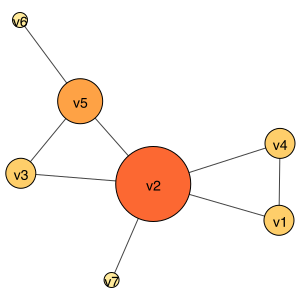

In [148]:
df=pd.DataFrame([
    ['v1','v2',0.3],
    ['v1','v4',0.6],
    ['v2','v3',0.9],
    ['v2','v4',0.2],
    ['v2','v5',0.3],
    ['v2','v7',0.2],
    ['v3','v5',0.6],
    ['v5','v6',0.1]
    ],
    columns=['n1','n2','w']
)
tuples = [tuple(x) for x in df.values]
g2 = ig.Graph.TupleList(tuples, directed = False, edge_attrs = ['w'])

g2.vs['degree']=[x*15 for x in g2.degree()]

#Set colors
temp=pd.DataFrame(list(zip(np.unique(g2.vs['degree']),
    sns.color_palette('YlOrRd').as_hex())), columns=['degree','col'])
degree_color=pd.concat([pd.Series(g2.vs['name'], name='name'), pd.Series(g2.vs['degree'], name='degree')],1)
degree_color=pd.merge(degree_color, temp, on='degree', how='left')
layout = g2.layout_auto()

g2.vs['color']=degree_color.col
ig.plot(g2, layout=layout, bbox=[300,300], vertex_label=g2.vs['name'], vertex_color=g2.vs['color'], vertex_size=g2.vs['degree'])


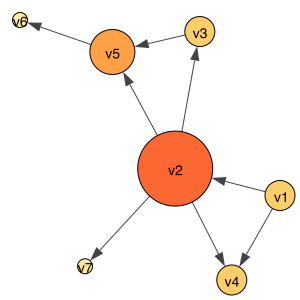

In [154]:
df=pd.DataFrame([
    ['v1','v2',0.3],
    ['v1','v4',0.6],
    ['v2','v3',0.9],
    ['v2','v4',0.2],
    ['v2','v5',0.3],
    ['v2','v7',0.2],
    ['v3','v5',0.6],
    ['v5','v6',0.1]
    ],
    columns=['n1','n2','w']
)
tuples = [tuple(x) for x in df.values]
g2 = ig.Graph.TupleList(tuples, directed = True, edge_attrs = ['w'])

g2.vs['in_degree']=[x*15 for x in g2.degree(mode='IN')]
g2.vs['out_degree']=[x*15 for x in g2.degree(mode='OUT')]
g2.vs['degree']=[x*15 for x in g2.degree()]

#Set colors
def degree_to_color(in_out_all_degree):        
    temp=pd.DataFrame(list(zip(np.unique(g2.vs[in_out_all_degree]),
        sns.color_palette('YlOrRd').as_hex())), columns=[in_out_all_degree,'col'])
    degree_color=pd.concat([pd.Series(g2.vs['name'], name='name'), pd.Series(g2.vs[in_out_all_degree], name=in_out_all_degree)],1)
    degree_color=pd.merge(degree_color, temp, on=in_out_all_degree, how='left')
    layout = g2.layout_auto()

    g2.vs['color']=degree_color.col
    plotout=ig.plot(g2, layout=layout, bbox=[300,300], vertex_label=g2.vs['name'], vertex_color=g2.vs['color'], vertex_size=g2.vs[in_out_all_degree])
    return(plotout)

degree_to_color('degree')

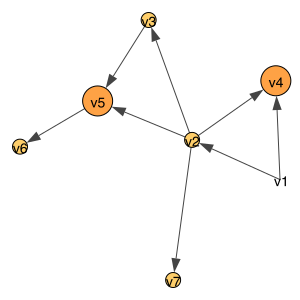

In [182]:
degree_to_color('in_degree')

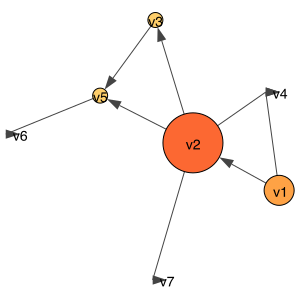

In [164]:
degree_to_color('out_degree')

RuntimeError: matplotlib does not support generators as input

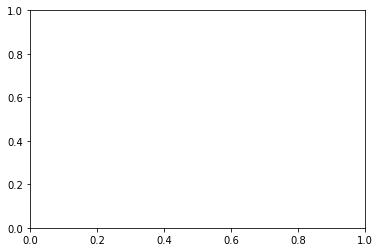

In [176]:

plt.hist(g2.degree_distribution().bins())
plt.show()

In [141]:
g2.degree(mode='IN')

[0, 1, 2, 1, 2, 1, 1]

In [142]:
g2.degree(mode='OUT')

[2, 4, 0, 1, 1, 0, 0]

In [116]:

# for dd in g2.vs['degree']:
#     node_color=degree_color.loc[degree_color.deg==dd,'col'].values[0]
#     g2.vs['color']=node_color

In [117]:
degree_color

,deg,col,name
0,15.0,#ebf8f9,v1
1,30.0,#addae0,v2
2,45.0,#6fbcc8,v4
3,75.0,#309eaf,v3
4,NaN,NaN,v5
5,NaN,NaN,v7
6,NaN,NaN,v6


In [107]:
g2.vs['color']

['#ebf8f9', '#ebf8f9', '#ebf8f9', '#ebf8f9', '#ebf8f9', '#ebf8f9', '#ebf8f9']

[20, 50, 20, 20, 30, 10, 10]

[(10, '#ebf8f9'), (20, '#addae0'), (30, '#6fbcc8'), (50, '#309eaf')]

['#ebf8f9', '#addae0', '#6fbcc8', '#309eaf']

In [61]:
g2.vs['name']

['v1', 'v2', 'v4', 'v3', 'v5', 'v7', 'v6']